### Q1-1) 아래에 주어진 주석을 기반으로 하여 코딩을 해주세요.

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pylab as plt
import random

In [2]:
learning_rate = 0.1
training_epochs = 15
batch_size = 100

In [3]:
#train과 test set으로 나누어 MNIST data 불러오기
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor())

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor())

In [4]:
mnist_train.train_data.shape

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])

In [5]:
mnist_train.train_labels[1:20]

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9])

In [6]:
#dataset loader에 train과 test할당하기(batch size, shuffle, drop_last 잘 설정할 것!)
#직관적으로 데이터를 불러올 때 사용되는 함수 
train_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)
test_loader = torch.utils.data.DataLoader(dataset=mnist_test,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [7]:
import matplotlib.pyplot as plt

mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True)

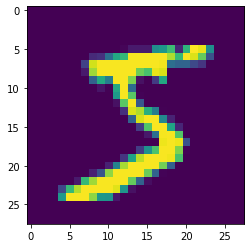

In [8]:
image , label = mnist_train[0]
plt.imshow(image)

In [9]:
# Layer 쌓기 (조건: 3개의 Layer 사용, DropOut 사용 (p=0.3), ReLU 함수 사용, Batch normalization하기)
# 각 Layer의 Hidden node 수 : 1st Layer (784,100), 2nd Layer(100,100),3rd Layer(100,10)
l1 = torch.nn.Linear(784,100,bias=True)
l2 = torch.nn.Linear(100,100,bias=True)
l3 = torch.nn.Linear(100,10,bias=True)

relu = torch.nn.ReLU() #activation function

dropout = torch.nn.Dropout(p=0.3)

bn1 = torch.nn.BatchNorm1d(100)
bn2 = torch.nn.BatchNorm1d(100)

In [10]:
#xavier initialization을 이용하여 각 layer의 weight 초기화
torch.nn.init.xavier_uniform_(l1.weight)
torch.nn.init.xavier_uniform_(l2.weight)
torch.nn.init.xavier_uniform_(l3.weight)

Parameter containing:
tensor([[ 0.1894, -0.1239, -0.1013,  0.2004, -0.0154,  0.1758, -0.0501, -0.2008,
          0.0062,  0.1097,  0.0684,  0.1347, -0.0835, -0.0482, -0.1981,  0.0104,
          0.1410, -0.0185, -0.0041, -0.1341,  0.1585,  0.0456,  0.2028, -0.1464,
          0.1983,  0.1811, -0.1629, -0.0149,  0.1978,  0.1461, -0.1211,  0.0390,
         -0.1649, -0.1296,  0.1514,  0.0626, -0.1835, -0.1530, -0.1928, -0.2168,
          0.0942,  0.2312, -0.2182,  0.0818,  0.0477,  0.2167, -0.1938,  0.0443,
         -0.1492,  0.0459, -0.1471, -0.1495,  0.2237,  0.1723,  0.0889, -0.2027,
          0.0707,  0.0936, -0.0731, -0.2113, -0.2113,  0.0158, -0.1726, -0.2272,
          0.0161,  0.1554, -0.0544,  0.0032, -0.2256, -0.2018,  0.1094, -0.0353,
          0.0479,  0.0754,  0.0026, -0.1751,  0.1005,  0.1881,  0.0698, -0.1987,
         -0.2081,  0.1048, -0.0348, -0.0504, -0.0235,  0.1259,  0.1735, -0.1751,
          0.0509, -0.2267,  0.0851,  0.0124, -0.0926, -0.0371, -0.0496,  0.1537,
      

In [11]:
# torch.nn.Sequential을 이용하여 model 정의하기(쌓는 순서: linear-Batch Normalization Layer - ReLU- DropOut)
model = torch.nn.Sequential(l1,bn1, relu, dropout,
                            l2,bn2, relu, dropout,
                            l3)

In [12]:
# Loss Function 정의하기 (CrossEntropy를 사용할 것!)
criterion = torch.nn.CrossEntropyLoss()

#optimizer 정의하기 (Adam optimizer를 사용할 것!)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [13]:
#cost 계산을 위한 변수 설정
train_total_batch = len(train_loader)
print(train_total_batch)

600


In [14]:
#Training epoch (cost 값 초기 설정(0으로)과 model의 train 설정 꼭 할 것)
model.train()
for epoch in range(training_epochs):
    avg_cost = 0
    
    for x,y in train_loader:
        x = x.view(-1,28*28)
        
        optimizer.zero_grad()
        y_pred = model(x)
        cost = criterion(y_pred,y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / train_total_batch 
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

Epoch: 0001 cost = 0.511439741
Epoch: 0002 cost = 0.372274667
Epoch: 0003 cost = 0.341008902
Epoch: 0004 cost = 0.323567450
Epoch: 0005 cost = 0.312733978
Epoch: 0006 cost = 0.297143221
Epoch: 0007 cost = 0.275262803
Epoch: 0008 cost = 0.264566690
Epoch: 0009 cost = 0.273316175
Epoch: 0010 cost = 0.260910660
Epoch: 0011 cost = 0.258301675
Epoch: 0012 cost = 0.260308534
Epoch: 0013 cost = 0.248466671
Epoch: 0014 cost = 0.239863127
Epoch: 0015 cost = 0.247576818


In [15]:
#test data로 모델의 정확도를 검증하는 코드 (model의 evaluation mode 설정 꼭 할 것)
#X_test 불러올 때 view를 사용하여 차원 변환할 것/ Y_test를 불러올때 labels사용
#accuracy의 초기 값 설정(0으로) 꼭 할 것
with torch.no_grad(): #메모리를 아낄 수 있음.. gradient값을 구하는 과정 생략함으로써
    model.eval() #dropout/batchnormalization
    X_test = mnist_test.test_data.view(-1, 28 * 28).float()
    Y_test = mnist_test.test_labels
    
    y_pred = model(X_test)
    correct_prediction = torch.argmax(y_pred,1) == Y_test 
    accuracy = correct_prediction.float().mean()
    print('Accuracy : ',accuracy.item())
    
    r = random.randint(0,len(mnist_test)-1)
    x_data = mnist_test.test_data[r:r+1].view(-1,28*28).float()
    y_data = mnist_test.test_labels[r:r+1]
    
    print('Label: ',y_data.item())
    y_pred = model(x_data)
    print('Prediction: ',torch.argmax(y_pred).item())

Accuracy :  0.9025999903678894
Label:  3
Prediction:  3


C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


### Q2 . 위에서 만든 모델에서 있던 Layer 들의 Hidden node 수를 증가 또는 감소 (ex: 200, 300, 50...) 시켰을 때, train set에서의 cost와 test set에서 Accuracy가 기존 결과와 비교하였을 때 어떻게 달라졌는지 비교해주시면 됩니다.

## hidden layer를 증가하는 경우에 cost함수가 더 빠르게 감소하나, accuracy는 거의 비슷한 값을 가짐

- 증가하는 경우

In [16]:
l1 = torch.nn.Linear(784,200,bias=True)
l2 = torch.nn.Linear(200,200,bias=True)
l3 = torch.nn.Linear(200,10,bias=True)

relu = torch.nn.ReLU() #activation function

dropout = torch.nn.Dropout(p=0.3)

bn1 = torch.nn.BatchNorm1d(200)
bn2 = torch.nn.BatchNorm1d(200)

In [17]:
torch.nn.init.xavier_uniform_(l1.weight)
torch.nn.init.xavier_uniform_(l2.weight)
torch.nn.init.xavier_uniform_(l3.weight)

Parameter containing:
tensor([[-0.0399, -0.1278,  0.0917,  ...,  0.1126, -0.0359, -0.1236],
        [ 0.1018, -0.0072, -0.1543,  ..., -0.0329,  0.0926,  0.0879],
        [-0.0161,  0.1412,  0.0879,  ...,  0.1578,  0.0945,  0.1456],
        ...,
        [-0.0406,  0.0049, -0.1609,  ..., -0.0372, -0.1637, -0.0608],
        [-0.1424, -0.1625, -0.0999,  ..., -0.0940, -0.1423,  0.1660],
        [ 0.0776, -0.1507, -0.1234,  ..., -0.0895, -0.0903, -0.0076]],
       requires_grad=True)

In [18]:
model2 = torch.nn.Sequential(l1,bn1, relu, dropout,
                            l2,bn2, relu, dropout,
                            l3)

In [19]:
# Loss Function 정의하기 (CrossEntropy를 사용할 것!)
criterion = torch.nn.CrossEntropyLoss()

#optimizer 정의하기 (Adam optimizer를 사용할 것!)
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate)

In [21]:
#Training epoch (cost 값 초기 설정(0으로)과 model의 train 설정 꼭 할 것)
model2.train()
for epoch in range(training_epochs):
    avg_cost = 0
    
    for x,y in train_loader:
        x = x.view(-1,28*28)
        
        optimizer.zero_grad()
        y_pred = model2(x)
        cost = criterion(y_pred,y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / train_total_batch 
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

Epoch: 0001 cost = 0.471155494
Epoch: 0002 cost = 0.337008059
Epoch: 0003 cost = 0.303309500
Epoch: 0004 cost = 0.266442627
Epoch: 0005 cost = 0.271706462
Epoch: 0006 cost = 0.246140346
Epoch: 0007 cost = 0.241504520
Epoch: 0008 cost = 0.228270620
Epoch: 0009 cost = 0.223125830
Epoch: 0010 cost = 0.209814787
Epoch: 0011 cost = 0.211759433
Epoch: 0012 cost = 0.206263870
Epoch: 0013 cost = 0.204197139
Epoch: 0014 cost = 0.199717239
Epoch: 0015 cost = 0.191915855


In [22]:
with torch.no_grad():
    model.eval() #dropout/batchnormalization
    X_test = mnist_test.test_data.view(-1, 28 * 28).float()
    Y_test = mnist_test.test_labels
    
    y_pred = model(X_test)
    correct_prediction = torch.argmax(y_pred,1) == Y_test 
    accuracy = correct_prediction.float().mean()
    print('Accuracy : ',accuracy.item())

Accuracy :  0.9025999903678894
